In [1]:
import yfinance as yf
import pandas as pd

In [2]:
stock = "VNA.DE"

In [3]:
t = yf.Tickers(stock)

### Dividents

In [4]:
df_div = t.tickers[stock].dividends

In [5]:
print(f"type:{type(df_div)}")

type:<class 'pandas.core.series.Series'>


In [6]:
df_div.head(8)

Date
2014-05-12 00:00:00+02:00    0.468082
2015-05-04 00:00:00+02:00    0.521577
2016-05-13 00:00:00+02:00    0.749755
2017-05-17 00:00:00+02:00    0.893325
2018-05-10 00:00:00+02:00    1.052848
2019-05-17 00:00:00+02:00    1.148561
2020-05-14 00:00:00+02:00    1.570000
2020-07-01 00:00:00+02:00    1.252251
Name: Dividends, dtype: float64

In [7]:
dates= df_div.index.date

In [8]:
dates[0]

datetime.date(2014, 5, 12)

### Stock Price

In [9]:
df_sp = yf.download(
        tickers = stock,
        period = "max",
        interval = "1d",
        group_by = 'ticker',
        prepost = False,
        repair = True
        )

VNA.DE: fixed 33/95 value=0 errors in 1h price data
VNA.DE: fixed 19/19 value=0 errors in 1d price data
[*********************100%***********************]  1 of 1 completed


In [10]:
df_sp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-07-11,14.336004,14.755185,14.310853,14.713267,10.688134,3899256
2013-07-12,14.688116,15.065379,14.671349,14.755185,10.718586,540935
2013-07-15,14.839021,15.124065,14.713267,15.124065,10.986550,382730
2013-07-16,15.233052,15.509712,15.065379,15.090530,10.962189,289282
2013-07-17,15.300121,15.300121,15.006694,15.216285,11.053540,1223409


### Joining

In [12]:
div = df_div.copy()
div = pd.DataFrame(div)
sp = df_sp.copy()

In [13]:
div=div.tz_localize(None)
div.index

DatetimeIndex(['2014-05-12', '2015-05-04', '2016-05-13', '2017-05-17',
               '2018-05-10', '2019-05-17', '2020-05-14', '2020-07-01',
               '2021-04-19', '2022-05-02', '2023-05-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [14]:
combined = sp.join(div, lsuffix='_sp', rsuffix='_div')

In [15]:
combined.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends
Date,,,,,,,
2013-07-11,14.336004,14.755185,14.310853,14.713267,10.688134,3899256,NaN
2013-07-12,14.688116,15.065379,14.671349,14.755185,10.718586,540935,NaN
2013-07-15,14.839021,15.124065,14.713267,15.124065,10.986550,382730,NaN
2013-07-16,15.233052,15.509712,15.065379,15.090530,10.962189,289282,NaN
2013-07-17,15.300121,15.300121,15.006694,15.216285,11.053540,1223409,NaN


In [16]:
combined.shape

(2535, 7)

In [17]:
combined.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03,11.000000
mean,35.739793,36.079668,35.360399,35.716613,30.007637,1.553424e+06,1.046760
std,12.783412,12.883812,12.687570,12.787032,12.062205,1.513949e+06,0.394252
min,14.336004,14.755185,14.310853,14.713267,10.688134,0.000000e+00,0.468082
25%,26.079370,26.300604,25.748218,26.071542,20.899235,9.252770e+05,0.799878
50%,34.955002,35.174999,34.634998,34.965000,28.435558,1.288238e+06,1.052848
75%,45.639999,46.169998,45.139999,45.580000,38.316311,1.831148e+06,1.300107
max,62.520000,62.740002,61.580002,62.220001,55.440014,2.896657e+07,1.660000


### Graphing

In [18]:
import matplotlib.pyplot as plt # importing the scripting interface
import matplotlib as mpl

%matplotlib inline

In [19]:
annotations = combined[combined['Dividends'].notnull()]

#### Dividend SP Graph

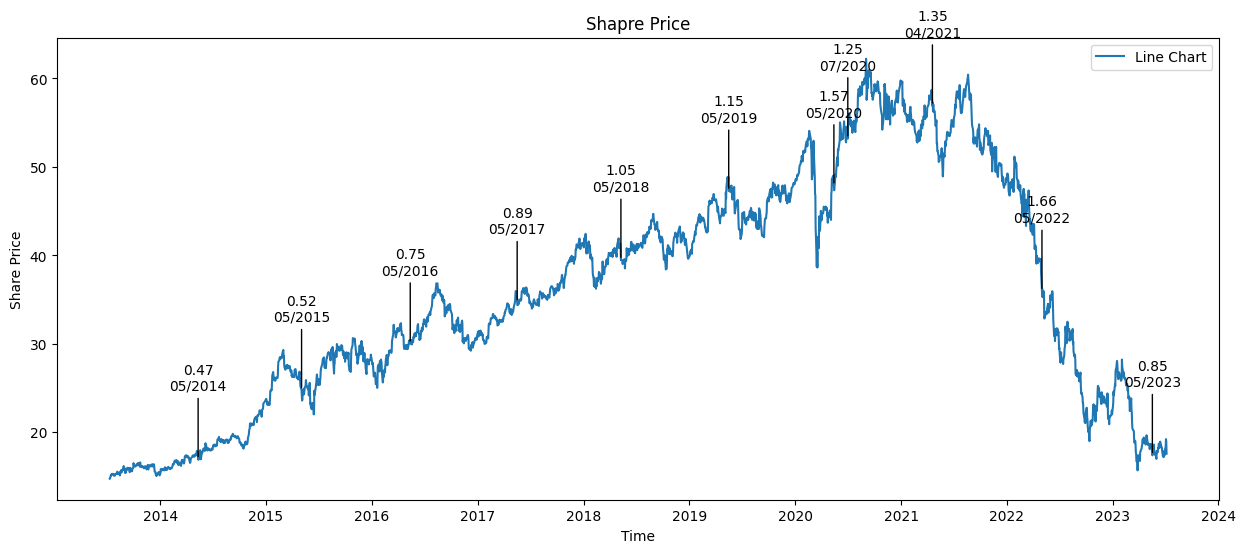

In [41]:

# Create the figure and axes
from numpy import NaN


fig, ax = plt.subplots(figsize=(15, 6))

# Plot the line chart
ax.plot(combined.index, combined.Close, label='Line Chart')

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Share Price')
ax.set_title('Share Price')

# Add a legend
ax.legend()

# Add annotations based on the 'label' column
for i, row in annotations.iterrows():
    x = i
    y = row["Close"]
    label = str(round(row['Dividends'],2)) + "\n" + i.strftime(('%m/%Y'))
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0,50), ha='center',
                arrowprops=dict(arrowstyle = '-', connectionstyle = 'arc3',facecolor='red'))

# Display the plot
plt.show()


#### Dividend Yield Graph

Yearly Avg SP

In [22]:
df_close_yr_avg = sp.groupby(sp.index.year).agg('mean')

In [29]:
df_close_yr_avg.index.name = "Year"
df_close_yr_avg.head(11)

,Open,High,Low,Close,Adj Close,Volume
Year,,,,,,
2013,15.822442,15.951895,15.611125,15.770943,11.456460,8.886761e+04
2014,18.331518,18.479595,18.187998,18.347869,13.574227,6.113781e+05
2015,27.225308,27.493476,26.900608,27.179520,20.570313,1.647741e+06
2016,31.198588,31.500765,30.879922,31.180216,24.157078,1.331403e+06
2017,35.189020,35.414745,34.942235,35.198608,27.962402,1.340394e+06
2018,40.731309,41.073373,40.352381,40.700754,33.179923,1.370766e+06
2019,45.110956,45.479721,44.723984,45.102430,37.660762,1.461053e+06
2020,53.374921,53.986260,52.773622,53.397913,46.593068,1.637941e+06
2021,54.277933,54.722731,53.768640,54.236869,49.129428,1.566231e+06


Yearly Div

In [27]:
df_div_yearly = div.groupby(div.index.year).agg("sum")
df_div_yearly

,Dividends
Date,
2014,0.468082
2015,0.521577
2016,0.749755
2017,0.893325
2018,1.052848
2019,1.148561
2020,2.822251
2021,1.347964
2022,1.660000


In [30]:
df_div_yield = df_close_yr_avg.join(df_div_yearly)
df_div_yield

,Open,High,Low,Close,Adj Close,Volume,Dividends
Year,,,,,,,
2013,15.822442,15.951895,15.611125,15.770943,11.456460,8.886761e+04,NaN
2014,18.331518,18.479595,18.187998,18.347869,13.574227,6.113781e+05,0.468082
2015,27.225308,27.493476,26.900608,27.179520,20.570313,1.647741e+06,0.521577
2016,31.198588,31.500765,30.879922,31.180216,24.157078,1.331403e+06,0.749755
2017,35.189020,35.414745,34.942235,35.198608,27.962402,1.340394e+06,0.893325
2018,40.731309,41.073373,40.352381,40.700754,33.179923,1.370766e+06,1.052848
2019,45.110956,45.479721,44.723984,45.102430,37.660762,1.461053e+06,1.148561
2020,53.374921,53.986260,52.773622,53.397913,46.593068,1.637941e+06,2.822251
2021,54.277933,54.722731,53.768640,54.236869,49.129428,1.566231e+06,1.347964


In [43]:
df_div_yield["DY"] = df_div_yield.Dividends / df_div_yield.Close # div growth
df_div_yield["DG"] = df_div_yield.Dividends.pct_change()
df_div_yield

,Open,High,Low,Close,Adj Close,Volume,Dividends,DY,DG
Year,,,,,,,,,
2013,15.822442,15.951895,15.611125,15.770943,11.456460,8.886761e+04,NaN,NaN,NaN
2014,18.331518,18.479595,18.187998,18.347869,13.574227,6.113781e+05,0.468082,0.025512,NaN
2015,27.225308,27.493476,26.900608,27.179520,20.570313,1.647741e+06,0.521577,0.019190,0.114286
2016,31.198588,31.500765,30.879922,31.180216,24.157078,1.331403e+06,0.749755,0.024046,0.437477
2017,35.189020,35.414745,34.942235,35.198608,27.962402,1.340394e+06,0.893325,0.025380,0.191489
2018,40.731309,41.073373,40.352381,40.700754,33.179923,1.370766e+06,1.052848,0.025868,0.178572
2019,45.110956,45.479721,44.723984,45.102430,37.660762,1.461053e+06,1.148561,0.025466,0.090909
2020,53.374921,53.986260,52.773622,53.397913,46.593068,1.637941e+06,2.822251,0.052853,1.457206
2021,54.277933,54.722731,53.768640,54.236869,49.129428,1.566231e+06,1.347964,0.024853,-0.522380


In [32]:
df_div_yield["DY"] * 100

Year
2013         NaN
2014    2.551152
2015    1.919007
2016    2.404586
2017    2.537955
2018    2.586802
2019    2.546561
2020    5.285321
2021    2.485328
2022    5.015628
2023    4.072154
Name: DY, dtype: float64

#### plotting